In [1]:
import sys
sys.path.append("../../")

In [16]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from ml.model.metrics import Metrics
from ml.visualization.visualization import Visualization

# Dataset - NFL

This dataset is comprised of statistics on all eligible receivers from the 2018 NFL regular season.

https://www.scikit-yb.org/en/latest/api/datasets/nfl.html

In [4]:
X, y = load_nfl()

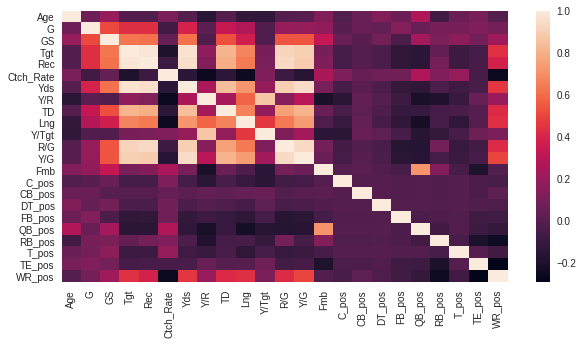

In [5]:
fig, ax = plt.subplots(figsize=(10,5))  
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

# Model

## Melhor k

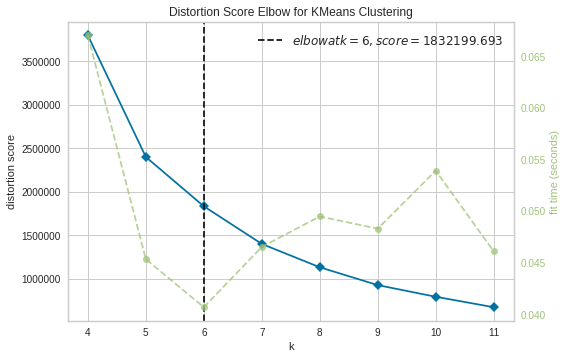

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## K = 7, 6, 5, 4, 3

In [32]:
ks = [7,6,5,4,3]
for k in ks:
    model = KMeans(k, random_state=42)
    model.fit(X)
    print("k=",k)
    print(Metrics.clusterization(X, model.labels_))
    print("____")

k= 7
{'silhouette': 0.5513915197956281, 'calinski_harabaz': 2877.012906939674}
____
k= 6
{'silhouette': 0.555415882094959, 'calinski_harabaz': 2624.6014277526388}
____
k= 5
{'silhouette': 0.6000510000078169, 'calinski_harabaz': 2481.00550272258}
____
k= 4
{'silhouette': 0.6092510814792557, 'calinski_harabaz': 2033.9029289856937}
____
k= 3
{'silhouette': 0.6900756311896874, 'calinski_harabaz': 1511.2378516010685}
____


# Visualizações para avaliar

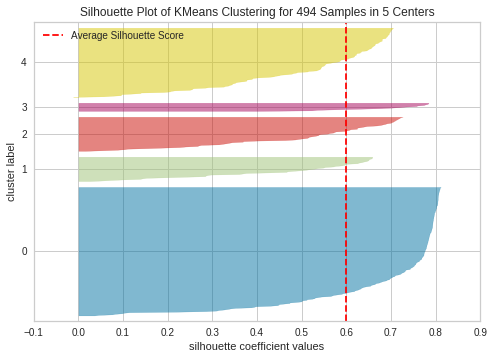

In [28]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()    